# Chapter 3 : Object Tracking

## Part 1: Video Processing and detection. 

Osman Stir Berk Milica Novakovic

In this first part of chapter 3, you will be asked to construct a series of functions tools to handle video processing and basic detection. You will use the same HOG+SVM classifier from Chapter 2 and adapt it to handle video input.

In contrast to the previous assignments, in this assignment, we will not provide a guided skeleton of the function. You will use any high level (already implemented) function from OpenCV to complete the exercise specifications and outputs. In addition, you will be asked to search in the documentation (or your favourite reference) the specific usage of the functions. 

__Section Objectives:__

* Construct a Video processing pipeline.
* Use OpenCV functions on the video frames for human detection.

__Data__:

The chapter data included inside ``../data/videos`` folder contains four sample videos to test your functions.

All the functions constructed in this first part will be used in the second part of video tracking, so make sure to understand each function and how to use it.


### Reading/Writting video

A video file can be abstracted as a bunch of images in order. As a first exercise, you need to construct a function to read and operate over each frame.


In [1]:
import cv2
import numpy as np
import os
import math
import tarfile
from utils import *
import matplotlib.pyplot as plt
import imutils
from imutils.object_detection import non_max_suppression
%matplotlib inline

#Import all the extra you may need.

In [2]:
def transformVideoFile(file_path, function, params ):
    """
    Given the path of a video file (file_path) the function reads every frame of the input video and applies a given
    transformation (function) usign the parameters (params)

    :input_image:       Input video file path 
    : function           Function be applied to each frame of the image.
    : params             Any parameter needed for the function above.
    :return:            output_handler this can be anything you may need to dave your results.
    """
    
    vidcap = cv2.VideoCapture(file_path)
    success = True
    final_output = []
    
    while success:
        success,image = vidcap.read()
        if image is not None:
            output_handler = function(image,params)
    final_output = output_handler
    
    return final_output


### Hints:

In [3]:
# Example of usage:
def dummy_function(image,params):
    if("dummy_function" in params[0]):
        print(params[1])
        print(params[2])
    return "I did it"


file_name = "../data/videos/video_human.avi"
dummy_params = [];
dummy_params.append("dummy_function");
dummy_params.append("Hello from the video file:")
dummy_params.append(file_name);


transformVideoFile(file_path=file_name,function=dummy_function,params=dummy_params)

Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the

../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos

'I did it'

The dummy example above defines a not very useful dummy_function that only prints a message if the first parameter (we saved the name in there) is its name. Notice that, in the correct version this dummy function __should be called once per frame__.

To read videos you can use the library __imutils__: ``pip install imutils``

There are several good tutorials online using that very same library.

Importatn google terms: 
* cv2.VideoCapture
* FileVideoStream



### Testing your function:

To test your function you need to process the video: ``../data/videos/video_gym.avi``. At each frame, you will count the number of __blue__ pixel. At the end you should return two outputs:

* The __frame number__ with the maximum number of blue pixels
* The __image__ frame with more blue pixels in greyscale, except for the blue pixels.

Display the image and the frame number. 

__Hint:__ Consider a blue pixel as any pixel in the range of the blue color in HSV: 
``([90,120,120]) , [130,255,255])``. 

__Hint 2__: Check the first assignment if you have no idea what am I talking about.  


The frame with max blue pixel contains 5891 blue pixels.
The frame with max blue pixel is:  154


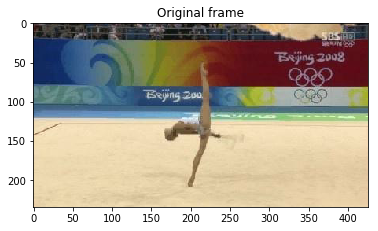

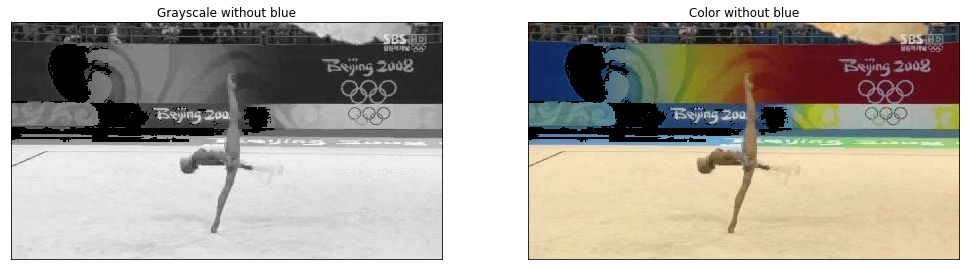

In [4]:
# your code
def process_frame_function(image,params):
    # Magic conversion and thresholding.
    # Magic counter of blue pixels
    image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    BLUE_MIN = params[0] #np.uint8([90, 100, 100])
    BLUE_MAX = params[1] #np.uint8([130, 255, 255])
    nr_all_blues=params[2]
    all_imgs=params[3]
    dst = cv2.inRange(image_hsv, BLUE_MIN, BLUE_MAX)
    nr_blue = cv2.countNonZero(dst)
    
    all_imgs.append(image)
    nr_all_blues.append(nr_blue)
    params[2]=nr_all_blues
    params[3]=all_imgs
    
    return nr_all_blues, all_imgs # Magic structure with the number of blue pixels and ANYTHING you may need.


file_path =  os.path.join('..','data', 'videos', 'video_gym.avi')

process_frame_function_params = []
# defining upper and lower blue bound
BLUE_MIN = np.uint8([90, 120, 120])
BLUE_MAX = np.uint8([130, 255, 255])
process_frame_function_params.append(BLUE_MIN)
process_frame_function_params.append(BLUE_MAX)
# this is the list of the number of pixels
process_frame_function_params.append([])
# this is the list of the images
process_frame_function_params.append([])

# calling the function to calculate the number of blue pixels and gives list of all images
nr_blue_list, image_list = transformVideoFile(file_path, process_frame_function, process_frame_function_params)


## Finding the frame number with largest amount of blue pixels
ind=np.argmax(nr_blue_list)
print("The frame with max blue pixel contains", nr_blue_list[ind], "blue pixels.")
print("The frame with max blue pixel is: ", ind+1 )

# find the image with the most blue pixels
image = image_list[ind]
display_image(image)
plt.title('Original frame')

# put the blue pixels on zero values, find the grayscale picture and display it
fig, ax = plt.subplots(1, 2, figsize=(17, 9))
image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
dst = cv2.inRange(image_hsv, BLUE_MIN, BLUE_MAX)
dst[dst==0]=1
dst[dst==255]=0
gray_max_blue=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
no_blue_color = cv2.bitwise_and(image, image, mask=dst)
no_blue_gray=dst*gray_max_blue
display_image(no_blue_gray, axes = ax[0])
ax[0].set_title('Grayscale without blue')
ax[0].set_xticks([])
ax[0].set_yticks([])
display_image(no_blue_color, axes=ax[1])
ax[1].set_title('Color without blue')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()

We could see that some of dark blue pixels stay untouched, because they are out of defined hsv range for the blue color. This frame maybe not contain the most blue pixels according to our visual system, but it contains the most blue pixel with respect how we define the blue colors 

## Exercise 2: The return of the HOG.

Do you remember HOG? No? Well, it's okay, since all you need is to remember how to use it:

Image has dimensions: (480, 640, 3)


([], <a list of 0 Text yticklabel objects>)

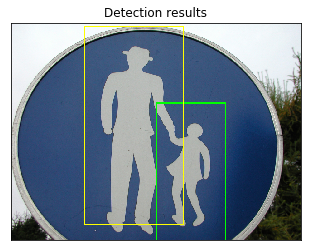

In [5]:
# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# load base image (check that we are not scaling, normalizing or changing the channels)
img = cv2.imread(os.path.join('..','data', 'person_454.bmp'))
print('Image has dimensions: {}'.format(img.shape))

# The HOG detector returns an array with the Regions of maximum likehood to contain a human-shaped-form
rects, weights = hog.detectMultiScale(img , winStride=(4, 4), padding=(8, 8), scale=1.05)

# draw the original bounding boxes
persons = 0;
for (x, y, w, h) in rects:
    cv2.rectangle(img , (x, y), (x + w, y + h), (0, 255, persons * 256), 2)
    persons += 1;
    
display_image(img);
plt.title('Detection results')
plt.xticks([])
plt.yticks([])

Finally, you will glue together your brand new image processing function and the HOG descriptor from OpenCV above.

### Testing your function:

To test your function you need to process the video: ``../data/videos/video_skater.avi``. At each frame, you will use HOG to detect any person in the frame. At the end of the function you should return: 

* The image __frame__ corresponding to __the seconds 1, 2, ... , 10__ of the video with the rectangle showing the "detected area". 

__Hint __: Check the second assignment if you have no idea what am I talking about.

__Be sure to display all the 10 frames for grading__


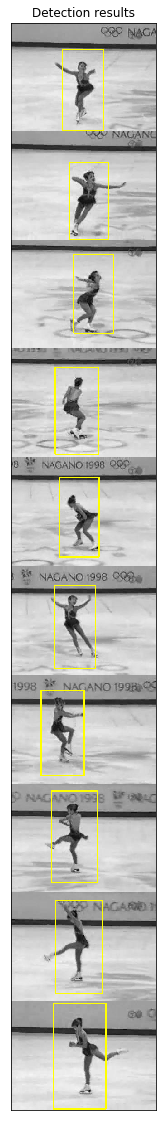

In [6]:
def people_detector(image,params):
    # Magic conversion and thresholding.
    # Magic counter of blue pixels
    scale = 0.75
    image_resized = np.empty([int(scale*image.shape[0]), int(scale*image.shape[1]), image.shape[2]], dtype="uint8")
    detected_image = image
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    image_resized = imutils.resize(image, width=int(scale*image.shape[1]))
    
    rects, _ = hog.detectMultiScale(image_resized, winStride=(2, 2), padding=(4, 4), scale=1.01)
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    thresh_val = params[0]
    rects = non_max_suppression(rects, probs=None, overlapThresh=thresh_val)
    # draw the bounding boxes on the not-resized image
    for (x, y, w, h) in rects:
        detected_image = cv2.rectangle(detected_image, (int(x/scale), int(y/scale)), (int(w/scale), int(h/scale)), (0, 255, 255), 2)
    params[1].append(detected_image)
    return params[1]

file_path = os.path.join('..','data', 'videos', 'video_skater.avi')

vidcap = cv2.VideoCapture(file_path)
people_detector_params = [];
thresh_val = 0.3
people_detector_params.append(thresh_val)
people_detector_params.append([])
all_the_output = transformVideoFile(file_path, people_detector, people_detector_params)

## Be sure to display the results below:
## Find frame number for each second
def find_frame(file_path):
    vidcap = cv2.VideoCapture(file_path)
    success = True
    count = 0
    frames_for_seconds=[]
    while success: 
        success,image = vidcap.read()
        if image is not None:
            length = vidcap.get(cv2.CAP_PROP_POS_MSEC)
            if length%1000 == 0:
                frames_for_seconds.append(count)
        count+=1
    return frames_for_seconds

frames_for_seconds = find_frame(file_path)

# plotting and stacking the images
plt.figure(figsize=(20,20))
sec = 10
disp_image = np.vstack(all_the_output[int(frames_for_seconds[i])] for i in range(sec))
plt.title('Detection results')
plt.xticks([])
plt.yticks([]);
display_image(disp_image)
plt.show()

We have use HOG+SVM detector on each frame on rescaled images. We have noticed that the resizing the image improves performance and the speed, due to the fact that image has smaller size so it requires less time to compute. We have used non-maximum supression to merge the windows, although without it we have only one detected window in the nine out of ten frames. We have noticed that the algorithm due to low scale value and low stride value is taking a lot of time to compute, but with this particular set of parameters we have just a small number of false positives and the no false negatives